# Deep Learning Hello World! (LeNet-5)

Objective: To be able to implement LeNet-5 for MNIST Classification

Step 1: Taking care of the imports which includes numpy, datasets, models, layers, optimizers, and utils. <br />
You will also be able to tell if your set-up is correct/complete.

In [22]:
from keras import backend as K
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from IPython.display import Image     # for displaying images
from IPython.core.display import HTML 

Step 2: Define LeNet-5 CNN model 

In [15]:
Image(url= "https://world4jason.gitbooks.io/research-log/content/deepLearning/CNN/img/lenet.png")

In [3]:
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same",
			input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

Step 3: Set-up some constants to be utilized in the training/testing of the model <br\>

In [12]:
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 
NB_CLASSES = 10  
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

np.random.seed(1983)  # for reproducibility

Step 4: Load the MNIST Dataset which are shuffled and split between train and test sets <br\>
- X_train is 60000 rows of 28x28 values
- X_test is 10000 rows of 28x28 values

First 100 train images:


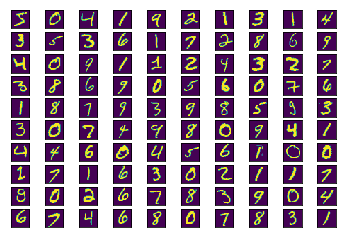

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("th")
print("First 100 train images:")
for k in range(100):
    plt.subplot(10, 10, k+1)      
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.imshow(X_train[k])

Step 5: Preprocess the input data by reshaping it, converting it to float, and normalizing it [0-1].

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 1, 28, 28) train samples
(10000, 1, 28, 28) test samples


Step 6: Convert class vectors to binary class matrices; One-Hot-Encoding (OHE)

In [8]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Step 7: Create the model with 3 layers: Input:784 ==> Hidden:128 w/ dropout ==> Hidden:128 w/ dropout ==> Output:10 (with Softmax activation)

In [9]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 20, 28, 28)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 14, 14)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 50, 14, 14)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 7, 7)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

Step 8: Compile the model with categorical_crossentropy loss function, Adam optimizer, and accuracy metric

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

Step 9: Perform the training with 128 batch size, 250 epochs, and 20 % of the train data used for validation

In [13]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 6s - loss: 0.0030 - acc: 0.9990 - val_loss: 0.0417 - val_acc: 0.9908
Epoch 2/250
48000/48000 [==============================] - 6s - loss: 0.0021 - acc: 0.9994 - val_loss: 0.0736 - val_acc: 0.9873
Epoch 3/250
48000/48000 [==============================] - 6s - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0454 - val_acc: 0.9916
Epoch 4/250
48000/48000 [==============================] - 6s - loss: 0.0043 - acc: 0.9987 - val_loss: 0.0511 - val_acc: 0.9900
Epoch 5/250
48000/48000 [==============================] - 6s - loss: 0.0033 - acc: 0.9989 - val_loss: 0.0636 - val_acc: 0.9893
Epoch 6/250
48000/48000 [==============================] - 6s - loss: 0.0040 - acc: 0.9988 - val_loss: 0.0474 - val_acc: 0.9910
Epoch 7/250
48000/48000 [==============================] - 6s - loss: 9.1074e-04 - acc: 0.9998 - val_loss: 0.0420 - val_acc: 0.9930
Epoch 8/250
48000/48000 [=========================

48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 124/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 125/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 126/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 127/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 128/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 129/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 130/250
48000/48000 [==============================] - 6s - loss: 1.19

48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 246/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 247/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 248/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 249/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933
Epoch 250/250
48000/48000 [==============================] - 6s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9933


Step 10: Evaluate the model on the test dataset (10,000 images)

In [16]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9824/10000 [============================>.] - ETA: 0s
Test score: 0.051760694336
Test accuracy: 0.993


Step 11: Plot the accuracy from history

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


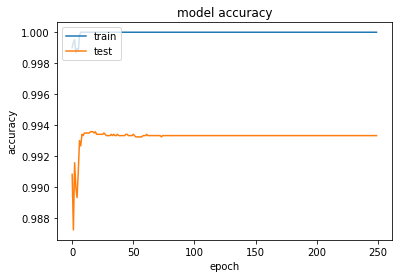

In [17]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Step 12: Plot the loss from history

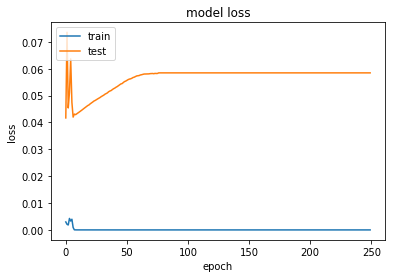

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[Optional] Step 13: Save the model (serialized) to JSON

In [19]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
%ls

 Volume in drive C is Windows
 Volume Serial Number is 4E4C-DF71

 Directory of C:\Users\ECE\workspace

21/09/2017  10:47 AM    <DIR>          .
21/09/2017  10:47 AM    <DIR>          ..
21/09/2017  10:03 AM    <DIR>          .ipynb_checkpoints
22/07/2017  07:42 AM    <DIR>          appium-project
21/09/2017  10:03 AM           136,338 DeepLearningHelloWorldPart4.ipynb
21/09/2017  10:45 AM           139,720 DeepLearningHelloWorldPart5.ipynb
13/09/2017  08:10 PM    <DIR>          Deep-Learning-with-Keras
13/09/2017  05:03 PM    <DIR>          five-video-classification-methods
14/09/2017  06:51 AM    <DIR>          keras
21/09/2017  10:47 AM             3,146 model.json
               3 File(s)        279,204 bytes
               7 Dir(s)  63,157,465,088 bytes free


[Optional] Step 14: Save the model weights

In [20]:
model.save_weights("model.h5")
%ls

 Volume in drive C is Windows
 Volume Serial Number is 4E4C-DF71

 Directory of C:\Users\ECE\workspace

21/09/2017  10:47 AM    <DIR>          .
21/09/2017  10:47 AM    <DIR>          ..
21/09/2017  10:03 AM    <DIR>          .ipynb_checkpoints
22/07/2017  07:42 AM    <DIR>          appium-project
21/09/2017  10:03 AM           136,338 DeepLearningHelloWorldPart4.ipynb
21/09/2017  10:47 AM           124,271 DeepLearningHelloWorldPart5.ipynb
13/09/2017  08:10 PM    <DIR>          Deep-Learning-with-Keras
13/09/2017  05:03 PM    <DIR>          five-video-classification-methods
14/09/2017  06:51 AM    <DIR>          keras
21/09/2017  10:47 AM         5,049,496 model.h5
21/09/2017  10:47 AM             3,146 model.json
               4 File(s)      5,313,251 bytes
               7 Dir(s)  63,152,427,008 bytes free


[Optional] Step 15: Load the saved model

In [23]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

[Optional] Step 16: Compile and evaluate loaded model

In [24]:
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 149s   

Test score: 0.051760694336
Test accuracy: 0.993
